# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb
For this problem set we do not run the bot, so try to debug your solutions with your own simple tests

## Problem 1 (20 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** 
1. To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

2. If $\mathrm{vec}(X)$ is a rowwise reshape,
$$\mathrm{vec}(AXB)=(A \otimes B^\top) \mathrm{vec}(X).$$

Suppose, $A$ is a $n\times m$ matrix, $X$ is $m\times p$ and $B$ is $p\times q$. 

$B = \left[ b_1 b_2 ... b_q \right]$, where $b_1, b_2, ..., b_q$ are columns of $B$. 

$AXB$ is a matrix $n\times q$. Let's look at its columns $k$, where $k \in \left \{1, 2, ..., q \right\}$:

$(AXB)_{:,k}$ = $AXb_k$ = $\sum_{i=1}^{p}(AX)_{:,i}b_{i,k}$ = $\sum_{i=1}^{p} AX_i b_{i,k}$ = (where $X_i$ is the i-th column of $X$) = $\sum_{i=1}^{p}b_{i,k}AX_i$ = $\left[ b_{1,k}A,  b_{2,k}A,  ... b_{q,k}A \right] 
           \begin{bmatrix}
           X_{1} \\
           X_{2} \\
           \vdots \\
           X_{p}
         \end{bmatrix} = 
\left[ b_{1,k}A,  b_{2,k}A,  ... b_{q,k}A \right] \mathrm{vec}(X) = (\left[ b_{1,k},  b_{2,k},  ... b_{q,k} \right] \otimes A ) \mathrm{vec}(X) = (b_k^T \otimes A ) \mathrm{vec}(X)$.

Finally, combining columns $(AXB)_{:,k}$ for all k in one vector, we get:

$\mathrm{vec}(AXB) = \begin{bmatrix}
           (AXB)_{:,1} \\
           (AXB)_{:,2} \\
           \vdots \\
           (AXB)_{:,q}
         \end{bmatrix}
         $ = $
         \begin{bmatrix}
           b_1^T \otimes A \\
           b_2^T \otimes A \\
           \vdots \\
           b_q^T \otimes A \\
         \end{bmatrix}
         \mathrm{vec}(X) $ 
         = $(B^T \otimes A)\mathrm{vec}(X)$. 
         
If $\mathrm{vec}(S)$ for some matrix $S$ is a row-wise operation, then to get the correct formula we need to transpose $\mathrm{vec}(S)$ to get the necessary column. So, the folmula would be:

$(\mathrm{vec}(AXB))^T = (B^T \otimes A)(\mathrm{vec}(X)^T)$. And since $(A \otimes B)^T = A^T \otimes B^T$, taking the transpose from the left and the right parts we'll get $\mathrm{vec}(AXB) = \mathrm{vec}(X)(B \otimes A^T)$. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

For matrices $A\in\mathbb{R}^{n\times m}$ and $B\in\mathbb{R}^{l\times k}$
its product $A\otimes B \in\mathbb{R}^{nl\times mk}$ will have $nmlk$ elements. If sizes of $x$ fit the matrix sizes, there are $nlmk$ multiplications (the same amount is needed to construct this big matrix) and $nl(mk-1)$ additions. Thus, the complexity of a naive computation is $\mathcal{O}(nmlk)$

By analogy with the formula from the previous exercise, we can write
$\underbrace{(A \otimes B)}_{nl\times mk} \underbrace{x}_{mk\times1} = 
\mathrm{vec}\big(\underbrace{B}_{l\times k}\;\underbrace{\mathrm{vec^{-1}}(x)}_{k\times m}\:\underbrace{A^\top}_{m\times n}\big)$  
Hmmm... For the sake of simplicity and because of lack of time, consider $m=l=k=n$
We have 3 matrix-by-matrix products, each of them costs $\mathcal{O}(n^3)$ operations. Therefore, we've reduced the complexity from $\mathcal{O}(n^4)$ to $\mathcal{O}(n^3)$.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$.

$A, B$ and $I$ are $n \times n$ matrices. Let $u_i, \lambda_i$ and $v_j, \mu_j$ be eigenvectors and eigenvalues of $A$ and $B$ respectively.  

One of the properties of the Kronecker product that was given in the lectures:

$(A \otimes B)(u_i \otimes v_j)$ =$(Au_i) \otimes (Bv_j)$. 

Consequently, $(A \otimes B)(u_i \otimes v_j)$ = $(\lambda_i u_i)\otimes(\mu_j v_j)$ = $ (\lambda_i \mu_j)(u_i \otimes v_j)$. 

From this, $(A \otimes I)(u_i \otimes v_j) = \lambda_i(u_i \otimes v_j)$. And $(I \otimes B)(u_i \otimes v_j) = \mu_j(u_i \otimes v_j)$. 

Finally, $(A \otimes I)(u_i \otimes v_j) + (I \otimes B)(u_i \otimes v_j) = (\lambda_i+\mu_j)(u_i \otimes v_j)$ (i,j from 1 to n).

So, eigenvalues of the matrix $(A \otimes I + I \otimes B)$ are $(\lambda_i+\mu_j)$ (i,j from 1 to n). And eignevectors are $(u_i \otimes v_j)$.

- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).

As we know from the lectures, for the **Richardson iteration** holds  

$$e_{k+1} \leq q e_k , \quad\rightarrow \quad e_k \leq q^{k} e_0,$$

where 

$$
   q = \frac{\lambda_{\max} - \lambda_{\min}}{\lambda_{\max} + \lambda_{\min}} = \frac{\mathrm{cond}(A) - 1}{\mathrm{cond}(A)+1},
$$

$$\mathrm{cond}(A) = \frac{\lambda_{\max}}{\lambda_{\min}} \quad \text{for} \quad A=A^*>0$$


For the matrix $A = \mathrm{diag}\left(\frac{1}{1000},\frac{1}{999},\dots \frac{1}{2}, 1, 1000 \right)$, $\lambda_{\max} = 1000$ and $\lambda_{\min} = \frac{1}{1000}$. Hence, cond(A) = 10$^6$. So, to get the relative accuracy of $10^{-4}$ we need k operations, where k satisfies:

$(\frac{10^6-1}{10^6+1})^k = 10^{-4}$. k is calculated below.

In [1013]:
np.log(1e-4)/np.log((1e6-1)/(1e6+1))

4605170.1860125

The convergence for the Chebyshev iteration is given by

$$
   e_{k+1} \leq C q^k e_0, \quad q = \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1},
$$

Thus, for the matrix $A = \mathrm{diag}\left(\frac{1}{1000},\frac{1}{999},\dots \frac{1}{2}, 1, 1000 \right)$,  cond(A) = 10$^6$. So, to get the relative accuracy of $10^{-4}$ we need k operations, where k satisfies:

$(\frac{10^3-1}{10^3+1})^k = 10^{-4}$. k is calculated below (here, C $\approx 1$. Of course, if C>>1, then k will be larger than it is calculated below). 

In [1015]:
np.log(1e-4)/np.log((1e3-1)/(1e3+1))

4605.168650930853

The convergence for the conjugate gradient method is the following:

from the lecture 11, we know that if eigenvalues are clustered and there are $l$ outliers, then after first $\mathcal{O}(l)$ iterations CG will converge as if there are no outliers. 

Thus, for the matrix $A = \mathrm{diag}\left(\frac{1}{1000},\frac{1}{999},\dots \frac{1}{2}, 1, 1000 \right)$ we'll have $\mathcal{O}(1)$ operations (because here 1000 is the only outlier), i.e. some constant number of operations, and then the convergence will be as if 1000 wasn't in this matrix. For such a matrix the condition number is $\frac{1}{1/1000}$ = 1000. Thus, to get the relative accuracy of $10^{-4}$ we need k operations, where k satisfies  (I neglected $\mathcal{O}(1)$ operations):

$(\frac{\sqrt{10^3}-1}{\sqrt{10^3}+1})^k = 10^{-4}$. k is calculated below:

In [1017]:
np.log(1e-4)/np.log((np.sqrt(1e3)-1)/(np.sqrt(1e3)+1))

145.57971229671443

## Problem 2 (40 pts)

### Spectral graph partitioning and inverse iteration


Given connected graph $G$ and its corresponding graph Laplacian matrix $L = D - A$ with eigenvalues $0=\lambda_1, \lambda_2, ..., \lambda_n$, where $D$ is its degree matrix and $A$ is its adjacency matrix, *Fiedler vector* is an eignevector correspondng to the second smallest eigenvalue $\lambda_2$ of $L$. Fiedler vector can be used for graph partitioning: positive values correspond to the one part of a graph and negative values to another.

### Inverse power method (15 pts)

To find the Fiedler vector we will use the inverse iteration with adaptive shifts (Rayleigh quotient iteration). 

* (5 pts) Write down the orthoprojection matrix on the space orthogonal to the eigenvector of $L$, corresponding to the eigenvalue $0$ and prove (analytically) that it is indeed an orthoprojection.

Denote $e$ as the eigenvector of $L$ corresponding to the eig. $0$.  
$Le = 0 e$. Thus $e$ is the solution of $Le = 0$.  
One can check that $e^\top = (1,\ldots,1)\quad$ (by construction the row sums of $L$ are zero).


In [209]:
ndim = 5
e = np.ones(ndim)
x = np.random.rand(ndim)

In [247]:
def proj_orth_toe(x,e):
    '''
    Orthoprojection matrix in the form of linear operator
    '''
    assert x.shape == e.shape
    return x - (x @ e) / (e @ e) * e 

In [251]:
P_A = np.apply_along_axis(lambda x : proj_orth_toe(x,e),
                          0,np.identity(ndim))
print("Projection matrix\n",P_A)

Projection matrix
 [[ 0.8 -0.2 -0.2 -0.2 -0.2]
 [-0.2  0.8 -0.2 -0.2 -0.2]
 [-0.2 -0.2  0.8 -0.2 -0.2]
 [-0.2 -0.2 -0.2  0.8 -0.2]
 [-0.2 -0.2 -0.2 -0.2  0.8]]


In [252]:
def orthproj_to1():
    '''
    Builds the orthoprojection matrix to the space orthogonal
    to the vector of ones by constructing set of n-1 independent
    vectors which are orthogonal to it.
    '''
    global e
    A = np.diag(-e)
    A[0] = e
    A = A[:,1:]
    P_A = A @ np.linalg.inv(A.T @ A) @ A.T
    return P_A

In [254]:
P_A = orthproj_to1()

print("Projection matrix for ndim = {}\n".format(ndim), P_A)
print("P_A @ x is the desired projection -",np.allclose(P_A @ x @ e,0))

print("\nCompare the methods")
print("1:",proj_orth_toe(x,e) @ e)
print("2:",P_A @ x @ e)
# The 2nd is less precise due to inverse operation

Projection matrix for ndim = 5
 [[ 0.8 -0.2 -0.2 -0.2 -0.2]
 [-0.2  0.8 -0.2 -0.2 -0.2]
 [-0.2 -0.2  0.8 -0.2 -0.2]
 [-0.2 -0.2 -0.2  0.8 -0.2]
 [-0.2 -0.2 -0.2 -0.2  0.8]]
P_A @ x is the desired projection - True

Compare the methods
1: 1.1102230246251565e-16
2: -1.1102230246251565e-16


* (5 pts) Implement the spectral partitioning as the function ```partition```:

In [1403]:
from scipy.sparse.linalg import spsolve
from scipy.sparse import identity

In [1404]:
def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps):
    '''
    # INPUT:
    # A - adjacency matrix (scipy.sparse.csr_matrix)
    # num_iter_fix - number of iterations with fixed shift (int)
    # shift - (float number)
    # num_iter_adapt - number of iterations with adaptive shift (int) 
    # -- Rayleigh quotient iteration steps
    # x0 - initial guess (1D numpy.ndarray)
    # eps - relative tolerance (float)
    # OUTPUT:
    # x - normalized Fiedler vector (1D numpy.ndarray)
    # eigs - eigenvalue estimations at each step (1D numpy.ndarray)
    '''
    
    e = np.ones(x0.size)
    I = identity(x0.size)
    x = x0
    eigs = np.array([0])
    Ash = A - shift * I
    exit_cond = 1.
    
    for _ in range(num_iter_fix):
        x = proj_orth_toe(x,e)
        Rx = (A @ x @ x) / (x @ x)
        x = spsolve(Ash,x)
        x /= np.linalg.norm(x)
        eigs = np.append(eigs,Rx)
        exit_cond = abs((eigs[-1] - eigs[-2]) / eigs[-1])
        if exit_cond < eps: 
            return x,eigs
        
    for _ in range(num_iter_adapt):
        x = proj_orth_toe(x,e)
        Rx = (A @ x @ x) / (x @ x)
        Ash = A - Rx * I
        x = spsolve(Ash,x)
        x /= np.linalg.norm(x)
        eigs = np.append(eigs,Rx)
        exit_cond = abs((eigs[-1] - eigs[-2]) / eigs[-1])
        if exit_cond < eps: break
            
    return x, eigs

Algorithm must halt before `num_iter_fix + num_iter_adapt` iterations if the following condition is satisfied $$ \boxed{\frac{|\lambda_k - \lambda_{k-1}|}{|\lambda_k|}\leq \varepsilon} \text{ at some step } k.$$

Do not forget to use the orthogonal projection from above in the iterative process to get the correct eigenvector.
It is also a good idea to use ```shift=0``` before the adaptive strategy is used. This, however, is not possible since the matrix $L$ is singular, and sparse decompositions in ```scipy``` does not work in this case. Therefore, we first use a very small shift instead.

* (3 pts) Generate a random `lollipop_graph` using `networkx` library and find its partition. [Draw](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) this graph with vertices colored according to the partition.

In [1405]:
import networkx as nx
import matplotlib.pyplot as plt

second smallest eigvalue:
 0.015914812888488446


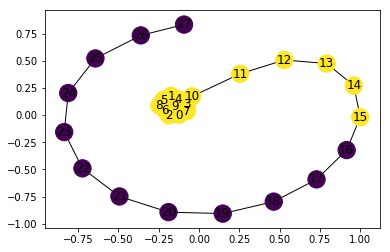

In [1406]:
m = np.random.randint(3,18)
d = np.random.randint(4,9)
n = m + d
graph = nx.lollipop_graph(m,n)
L = nx.laplacian_matrix(graph)

x0 = np.random.rand(graph.number_of_nodes())
x,eigs = partition(L,1e-3,5,100,x0,1e-6)
nx.draw_networkx(graph,node_color=np.sign(x))
print("second smallest eigvalue:\n",eigs[-1])

* (2 pts) Start the method with a random initial guess ```x0```, set ```num_iter_fix=0``` and comment why the method can converge to a wrong eigenvalue.

second smallest eigvalue:
 3.7143412771213153


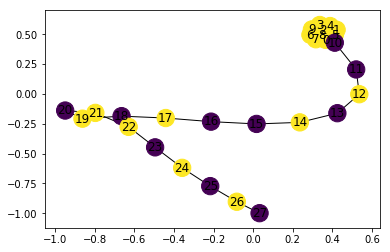

In [1407]:
x,eigs = partition(L,1e-3,0,100,x0,1e-6)
nx.draw_networkx(graph,node_color=np.sign(x))
print("second smallest eigvalue:\n",eigs[-1])

***Initially, we don't have even a geuss on what the value of the second smallest eigenpair is. So, we do some iterates with a small shift*** *(shifting of diag. elements doesn't change the eigenvectors of a matrix; shifted eigenvalues correspond to the original eigenvectors; we should choose such a small shift which doesn't change the order of eigenpairs in absolute value; just a fact: if not absolute value, there is no change in order, since $L \ge 0$, no matter, convergence occurs in abs.value. A successful choice leads to the convergence to the second smallest because of artificial sidetracking from the very smallest by orthogonal projecting)* ***to get close to the 2nd smallest eigenvalue. From here we can switch to the adaptive strategy.   
If starting immediately with adaptive strategy we will converge to the eigenvector (and its corresponding eigenvalue) which is closer to the starting point $x_0$ which in its turn is chosen randomly. So, we likely  obtain not the second smallest if we don't know it beforehand***

### Spectral graph properties (15 pts)

* (5 pts) Prove that multiplicity of the eigenvalue $0$ in the spectrum of the graphs Laplacian is the number of its connected components.

The following excerpt was taken from here: http://theory.stanford.edu/~tim/s17/l/l11.pdf 

*I don't see any reason to change it in order then to pass it off as my own, so I just bring it here almost as it is.*

*Proof*: We first show that the number of zero eigenvalues is at least the number of connected components of $G$. Indeed, assume that $G$ has $k$ connected components, corresponding to the
partition of V into disjoint sets $S_1,\ldots, S_k$. Define $k$ vectors
$v_1,\ldots, v_k$ s.t. $v_i(j) = 1/\sqrt{|S_i|}$ if $j \in S_i$
, and $0$ otherwise. For $i = 1,\ldots,k$, it holds that $\|v_i\| = 1$. Additionally, for $i \neq j$, because the sets $S_i, S_j$ are disjoint, 
$\langle v_i,v_j \rangle = 0$. Finally, note that $Lv_i = 0$. Hence there is a set of $k$ orthonormal vectors that are all eigenvectors of $L$, with eigenvalue $0$.  

To see that the number of $0$ eigenvalues is at most the number of connected components of $G$, note that since 
$v^\top Lv = \sum_{i<j,(i,j)\in E}\left(v(i) − v(j)\right)^2,$ this expression can only be zero if $v$ is constant on every connected component. To see that there is no way of finding a $k + 1$-st vector $v$ that is a zero eigenvector, orthogonal to $v_1,\ldots,v_k$ observe that any eigenvector, $v$ must be nonzero in some coordinate, hence assume that $v$ is nonzero on a coordinate in set $S_i$, and hence is nonzero and constant on all indices in set $S_i$, in which case $v$ can not be
orthogonal to $v_i$, and there can be no $k + 1$-st eigenvector with eigenvalue $0$. $\blacksquare$


* (10 pts) The second-smallest eigenvalue of $L(G)$, $\lambda_2(L(G))$, is often called the algebraic connectivity of the
graph $G$. A basic intuition behind the use of this term is that a graph with a higher algebraic
connectivity typically has more edges, and can therefore be thought of as being “more connected”.  
To check this statement, create few graphs with equal number of vertices using `networkx`, one of them should be $C_{30}$ - simple cyclic graph, and one of them should be $K_{30}$ - complete graph. (You also can change the number of vertices if it makes sense for your experiments, but do not make it trivially small).
    * Find the algebraic connectivity for the each graph using inverse iteration.
    * Plot the dependency $\lambda_2(G_i)$ on $|E_i|$.
    * Draw a partition for a chosen graph from the generated set.
    * Comment on the results.

number of edges: 113


C:\Users\onion\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:192: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


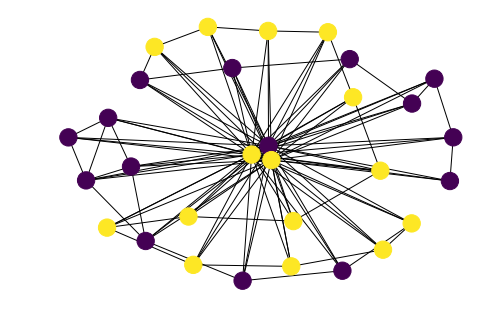

In [1408]:
G = nx.cycle_graph(30)
x0 = np.random.rand(30)
L = nx.laplacian_matrix(G)
s = partition(L,1e-4,10,100,x0,1e-8)[1][-1]
alg_con = [s]
num_edges = [G.number_of_edges()]
for i in range(0,28):
    for k in range(2,30-i):
        j = (i + k) % 30
        G.add_edge(i,j)
        L = nx.laplacian_matrix(G)
        x,eigs = partition(L,1e-4,10,100,x0,1e-8)
        cardE = G.number_of_edges()
        if i == 3 and k == 4:
            nx.draw(G,node_color=np.sign(x))
            print("number of edges:",G.number_of_edges())
        if cardE > num_edges[-1]:
            alg_con.append(eigs[-1])
            num_edges.append(cardE)

Text(0.5,0,'number of edges')

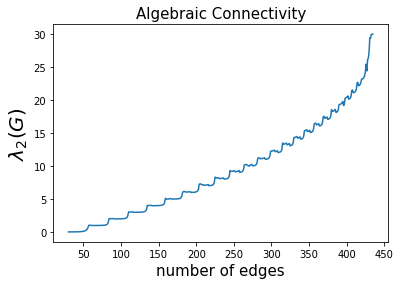

In [1409]:
plt.title("Algebraic Connectivity",size=15)
plt.plot(num_edges,alg_con)
plt.ylabel(r"$\lambda_2 (G)$",size=20)
plt.xlabel("number of edges",size=15)

### Image bipartition (10 pts)

Let us deal here with a graph constructed from a binarized image.
Consider the rule, that graph vertices are only pixels with $1$, and each vertex can have no more than $8$ connected vertices (pixel neighbours), $\textit{i.e}$ graph degree is limited by 8.
* (3 pts) Find an image with minimal size equal to $(256, 256)$ and binarize it such that graph built on black pixels has exactly $1$ connected component.
* (5 pts) Write a function that constructs sparse adjacency matrix from the binarized image, taking into account the rule from above.
* (2 pts) Find the partition of the resulting graph and draw the image in accordance with partition.

In [1410]:
# Your solution is here
from PIL import Image
import requests
from scipy.sparse import diags as spdiags

In [1411]:
url = "https://avatars.mds.yandex.net/get-pdb/939428/ad107991-6372-4f39-bb2d-4cdc543bdfa1/s800"
snake = Image.open(requests.get(url,stream=True).raw)

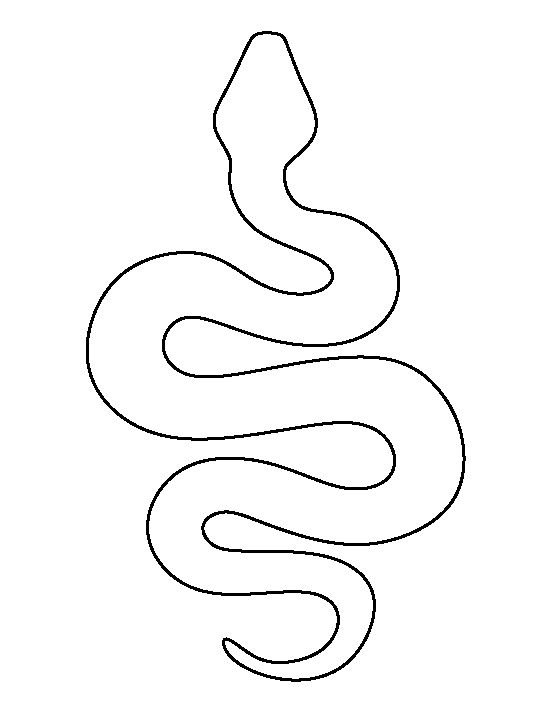

In [1412]:
snake

In [1397]:
data = np.array(snake)

In [ ]:
def binary_image_to_adj_matrix(image):
    r, c = image.shape
    diagVec1 = np.tile(np.append(np.ones(c-1), [0]), r)[:-1]
    diagVec2 = np.append([0], diagVec1[:c * (r - 1)])
    diagVec3 = np.ones(c * (r - 1))
    diagVec4 = diagVec2[1:-1]
    u = sp.sparse.diags([diagVec1, diagVec2, diagVec3, diagVec4], [1, c - 1, c, c + 1], format='csr')
    idx = np.nonzero(image.reshape(-1))[0]
    u = u[idx].T[idx]
    return u + u.T, idx

In [1398]:
def adj_mat(data):
    x,y = np.where(data == 0)
    D = {(i,j): k for k,(i,j) in enumerate(zip(x,y))}
    rows = np.array([],dtype=int)
    cols = np.array([],dtype=int)
    vals = np.array([],dtype=int)
    feed = np.arange(-1,2)
    dx,dy = np.meshgrid(feed,feed)
    def op(i,j):
        try:
            if i != j: return D[(i,j)]
            else: return -1
        except KeyError:
            return -1
    pixels = np.vectorize(op)
    for i,j in zip(x,y):
        search = pixels(i + dx,j + dy).flatten()
        found = search[search > -1]
        if not found.size:
            continue
        feed = np.repeat(D[(i,j)],len(found))
        feed = np.append(feed,found)
        rows = np.append(rows,feed)
        cols = np.append(cols,feed[::-1])
        vals = np.append(vals,np.ones(2 * len(found)))
    A = csr_matrix((vals,(rows,cols)),shape=(x.size,x.size))
    return A

In [1399]:
A = adj_mat(data)
D = spdiags(np.array(A.sum(1)).reshape(-1))
L = D - A
x0 = np.random.rand(L.shape[0])
x,eigs = partition(L,1e-2,100,100,x0,1e-8)

C:\Users\onion\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:192: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


In [1414]:
A.shape

(4657, 4657)

In [1400]:
cmap = 120 + 50 * np.sign(x)

C:\Users\onion\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sign
  """Entry point for launching an IPython kernel.


In [1401]:
x,y = np.where(data == 0)
data[x,y] = cmap

In [1413]:
data.shape

(712, 550)

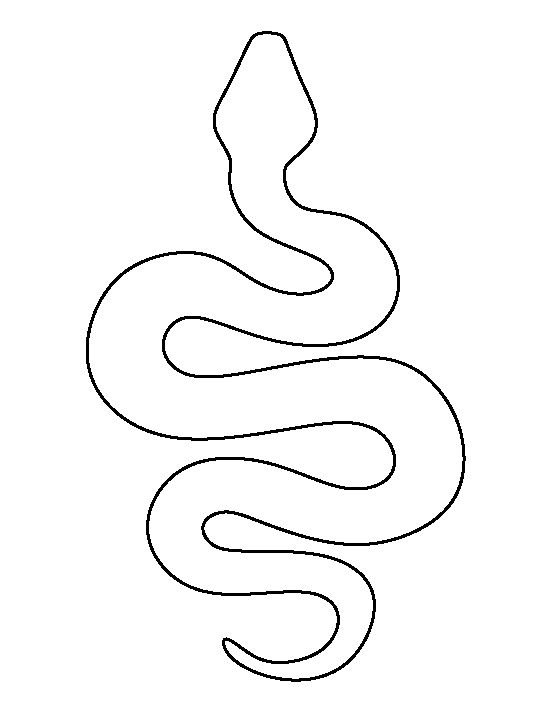

In [1402]:
Image.fromarray(np.uint8(data))

# Problem 3 (30 pts)

## Say hi to the drone

You received a radar-made air scan data of a terrorist hideout made from a heavy-class surveillance drone. Unfortunately, it was made with an old-fashioned radar, so the picture is convolved with the diffractive pattern. You need to deconvolve the picture to recover the building plan.

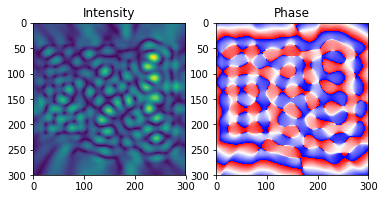

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import hankel2
from scipy.sparse.linalg import LinearOperator
from scipy.sparse.linalg import gmres
radiointel = np.load('radiointel.npy')
plt.subplot(1,2,1)
plt.imshow( np.abs(radiointel) )
plt.title('Intensity')
plt.subplot(1,2,2)
plt.imshow( np.angle(radiointel), cmap='bwr' )
plt.title('Phase')
plt.show()

In this problem you asked to use using FFT-matvec and make the convolution operator for the picture of the size $N\times N$, where $N=300$ with the following kernel (2D Helmholtz scattering):
$$
   G_{\overline{i_1 j_1}, \overline{i_2 j_2} } = \frac{-1j}{4} H^{(2)}_0 \left( k_0 \cdot \Delta r_{\overline{  i_1 j_1  } , \overline{ i_2 j_2}  } \right), \quad i_1,j_1, i_2, j_2 = 0,\dots, N-1 $$

except when both $i_1=i_2$ and $j_1 = j_2$. 

In that case set $$G_{i_1=i_2, j_1=j_2} = 0$$.

Here
$1j$ is the imaginary unit, $H^{(2)}_0(x)$ - (complex-valued) Hankel function of the second kind of the order 0. See 'scipy.special.hankel2'.

$$ \Delta r_{\overline{  i_1 j_1  } , \overline{ i_2 j_2}  } = h \sqrt{  (i_1-i_2)^2 + (j_1-j_2)^2  } $$
$$ h = \frac{1}{N-1}$$
$$k_0 = 50.0$$



See https://github.com/oseledets/nla2018/blob/master/lectures/lecture-15.ipynb for the recipe.

For the kernel array, there is a following element correspondence with BTTB matrix G:

$$eG_{i_1-i_2, j_1 - j_2} \equiv np.roll(np.roll( G_{\overline{i_1 j_1}, \overline{i_2 j_2} }    ,-N, axis=1),-N, axis=0)$$


### Tasks:

1. Create the complex-valued kernel $eG$ ($2N-1 \times 2N-1$)-sized matrix according with the instructions above. Note that at the point where $\Delta r=0$ value of $eG$ should be manually zet to zero. Store in the variable eG. Plot the eG.real of it with plt.imshow

2. Write function `Gx` that calculates matvec of $G$ by a given vector $x$. Make sure all calculations and arrays are in dtype=np.complex64. 

Hint 1: matvec with a discrete delta function (vector of all zeros with one lone 1.0 somewhere) should return a kernel function centered on the location of the delta function. If this doesn't happen, something is wrong.

Hint 2: As shown in the lecture slides, kernel eG should be cyclically shifted on both dimensions (np.roll), such that the center of the Green's function is located at eG[0,0] to work properly inside fft2 function.

3. What is the complexity of one matvec? 
4. Use `scipy.sparse.linalg.LinearOperator`  to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.
5. Write a function that takes an appropriate Krylov method(s) and solves linear system $Gx=b$ to deconvolve `radiointel`. The result should be binary mask array (real, integer, of 0s and 1s) of the plane of the building. Make sure it converged sufficiently and you did the post-processing properly. Plot the result as an image. 
    
    
**Note:** You can use standart fft and ifft from e.q. `numpy.fft`


### 1. Kernel (5 pts)

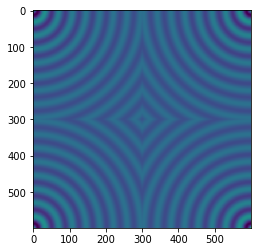

In [75]:
k0 = 50#
N = 300#

def make_eG(k0, N):
    # INPUT:  
    # k0 #dtype = float
    # N #dtype = int
    
    # OUTPUT:
    # np.array, shape = (2N-1, 2N-1), dtype = np.complex64
    feed = np.roll(np.arange(-N + 1,N),N)
    x,y = np.meshgrid(feed,feed)
    dr = 1. / (N - 1) * np.sqrt(x ** 2 + y ** 2)
    eG = -1j / 4 * np.nan_to_num(hankel2(0,k0 * dr))
    
    return eG

eG = make_eG(k0=k0, N=N)
plt.imshow(eG.real)

### 2. Matvec (5 pts)

In [76]:
def Gx(x, eG):
    # input:  
    # x, np.array, shape=(N**2, ), dtype = np.complex64
    # eG, np.array, shape=(2N-1, 2N-1), dtype = np.complex64
    # output:
    # matvec, np.array, shape = (N**2, ), dtype = np.complex64
    n = int(x.size ** 0.5)
    X = np.zeros((2 * n - 1, 2 * n -1),dtype=np.complex64)
    X[:n,:n] = x.reshape(n,n)
    convolution = np.fft.ifft2(np.fft.fft2(eG) * np.fft.fft2(X))
    matvec = convolution[:n,:n].reshape((-1,))
    
    return matvec

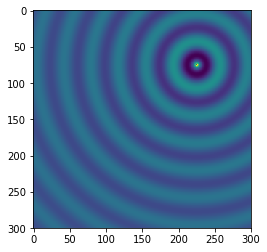

In [77]:
# tests
x = np.zeros(300 * 300)
pos = 300 * 300 // 4 + 3 * 300 // 4 #upper right quadrant
x[pos] = 1
y = Gx(x,eG)
plt.imshow(y.real.reshape(300,300))

### 3. Complexity (3 pts)

Big-O complexity of one matvec operation is ... It can be shown...

### 4. LinearOperator (2 pts)

In [78]:
LinOp = LinearOperator((300**2,300**2),
               dtype=np.complex64,
               matvec=lambda t: Gx(t,eG))

### 5. Reconstruction (15pts)

In [79]:
radiointel = radiointel.reshape((-1,))

Text(0.5,1,'Convergence')

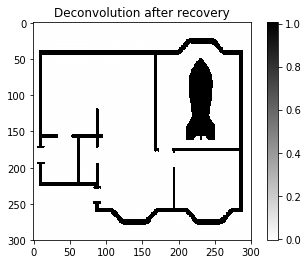

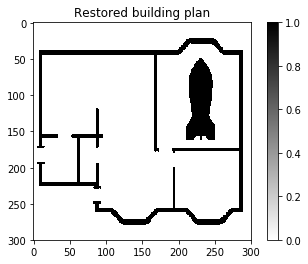

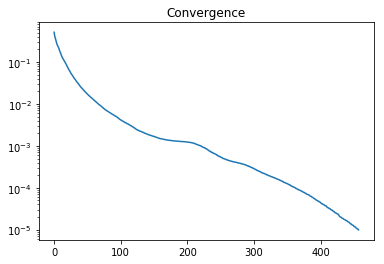

In [81]:
def normalize(mask): #proper normalization to binary mask
    mask = np.clip(mask, a_min=0, a_max=1)
    mask = np.round(mask)
    mask = np.asarray(mask, dtype=int)
    return mask

errs=[]
def callback(err): #callback function to store the history of convergence
    global errs
    errs.append(err)
    return 

mask,_ = gmres(LinOp,radiointel,restart=500,maxiter=1000,callback=callback)
#some_solver(, , , callback = callback)

mask = mask.reshape(300,300)

plt.figure()
plt.imshow( mask.real , cmap='binary')
plt.title('Deconvolution after recovery')
plt.colorbar()

plt.figure()
plt.imshow( normalize(  mask.real ) , cmap='binary')
plt.title('Restored building plan')
plt.colorbar()

plt.figure()
plt.semilogy(errs)
plt.title('Convergence')